In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,plot_roc_curve

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it

In [2]:
df=pd.read_csv("heart-disease.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum() #if any values is missing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.corr() #correlation metrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


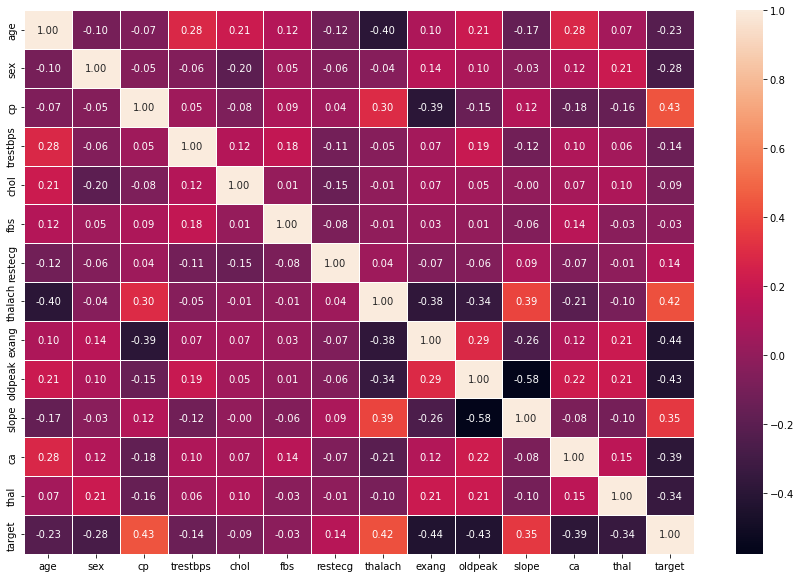

In [13]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f")

In [17]:
df['target'].value_counts() #jo pridiction cahiye

1    165
0    138
Name: target, dtype: int64

In [18]:
countNoDisease=len(df[df.target==0]) #in percentage
countHaveDisease=len(df[df.target==1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


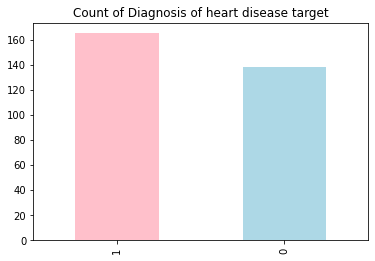

In [20]:
#Understanding the balancing of the data

df['target'].value_counts().plot(kind='bar',color=['pink','lightblue'],title="Count of Diagnosis of heart disease target");

In [22]:
# Male and Female

df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
#Compare Target column i.e. Heart Disease with Sex Column

pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

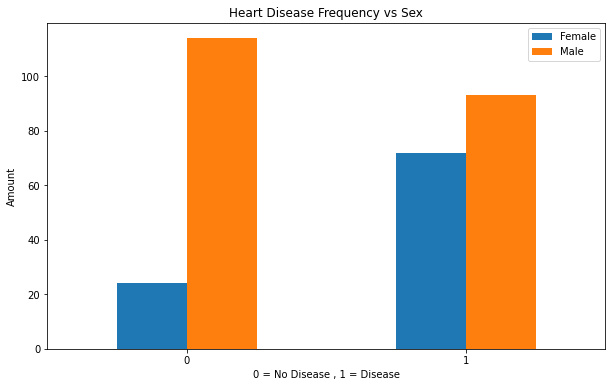

In [24]:
#Create a plot for crosstab

pd.crosstab(df['target'],df['sex']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

Text(0.5, 1.0, 'plot on Relation Between Maximum heart rate and chest pain types with respect to gender')

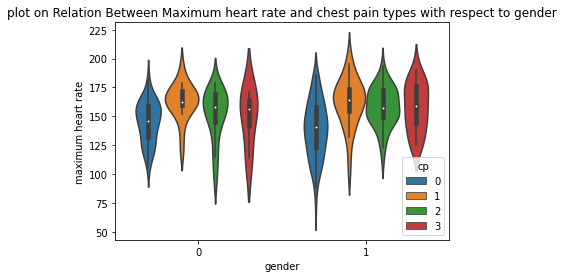

In [26]:
#Plot on Relation Between Maximum heart rate and chest pain types with respect to gender
sns.violinplot(x="sex", y="thalach",hue="cp", data=df,
               cmap =["bupy"]);
plt.xlabel('gender')
plt.ylabel('maximum heart rate')
plt.title("plot on Relation Between Maximum heart rate and chest pain types with respect to gender")

In [27]:
#Plot on Relation Between Maximum heart rate and chest pain types with respect to gender
#The Violen plots of the gender male have higher median and quatile region compared to females and the chest pain type 1 which is atypical angina is higher with respect to the maximum heart rate in both the gender

Text(1.0, 1.0, 'Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender')

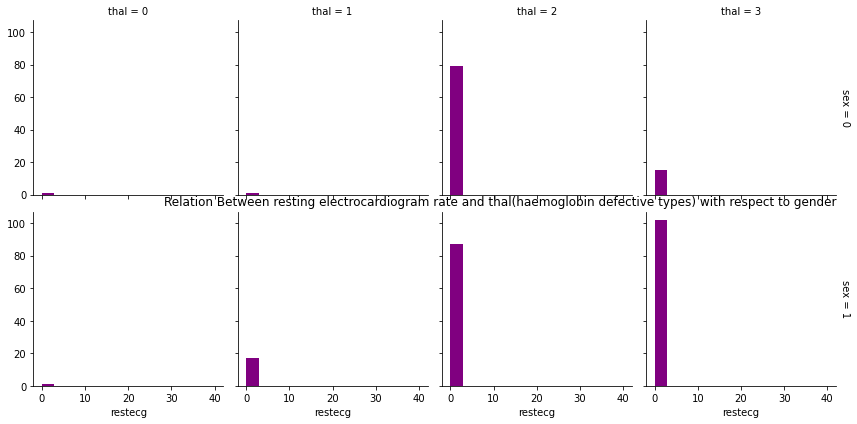

In [29]:
#Plot on Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender
grid = sns.FacetGrid(df, row="sex", col="thal", margin_titles=True)
grid.map(plt.hist, "restecg", bins=np.linspace(0, 40, 15),color = "Purple");
plt.xlabel('restecg')
plt.ylabel('thal(haemoglobin defective) types')
plt.title(label="Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender",loc ='right')

In [30]:
#Interpretation
#The histogram plots of the resting ectrocardiogram rate and heamoglobin lowering defect with respect to gender shows that both the gender have same restecg , but the haemoglobin lowering defect type 2 is greater in males whereas the haemoglobin lowering reverse effect type 3 is greater in males and lesser in females , therefore it is tough for females to get back the haemoglobin content if there is a loss on the other hand it is easier for men to get back there haemoglobin conten

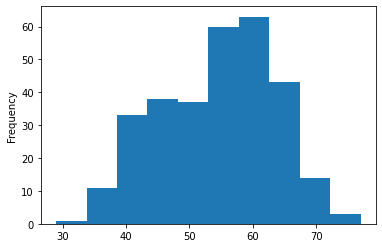

In [32]:
#Check the distribution of the age column with a histogram

df['age'].plot(kind='hist');

In [33]:
df['thalach'].value_counts()

#Here Length denotes how many different types of categories are there

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

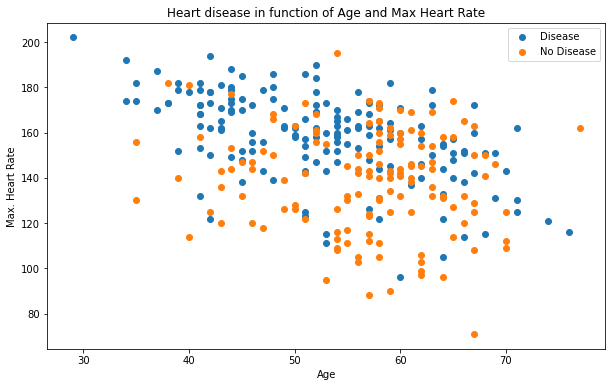

In [35]:
plt.figure(figsize=(10,6))

#Target is equal to 1
plt.scatter(x = df[df['target']==1]['age'], y = df.thalach[df.target==1])

#Target is equal to 0
plt.scatter(x = df[df['target']==0]['age'], y = df.thalach[df.target==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease","No Disease"])

In [37]:
# Relation of Heart Disease with Chest Pain Type

pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


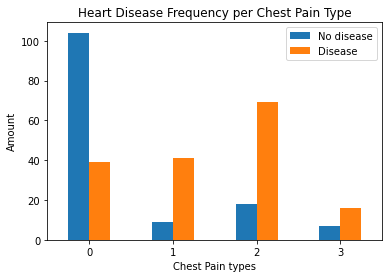

In [39]:
# Make the crosstab more visual

pd.crosstab(df['cp'],df['target']).plot(kind='bar')
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

<AxesSubplot:ylabel='Density'>

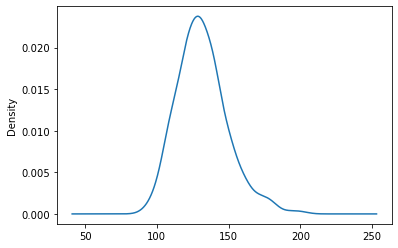

In [40]:
df['trestbps'].plot(kind='kde')

Text(0.5, 1.0, 'Relation Between resting chest pain types and Blood Pressure Rate with respect to gender')

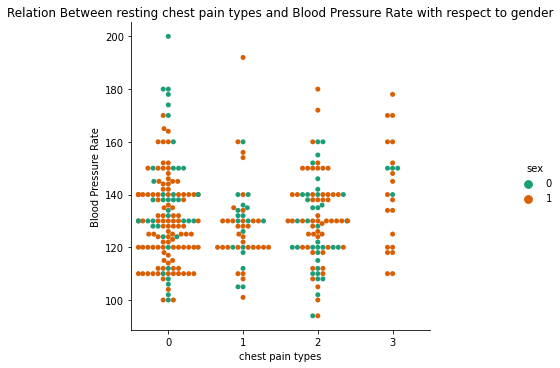

In [41]:
#Plot on Relation Between resting chest pain types and Blood Pressure Rate with respect to gender
sns.catplot(x="cp", y="trestbps",hue="sex",kind ="swarm" ,data=df,palette="Dark2")
plt.xlabel('chest pain types')
plt.ylabel('Blood Pressure Rate')
plt.title(label="Relation Between resting chest pain types and Blood Pressure Rate with respect to gender",loc ='center')

In [42]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [43]:
#Compare Target column i.e. Heart Disease with Fasting Blood Sugar Column

pd.crosstab(df['target'],df['fbs'])

fbs,0,1
target,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

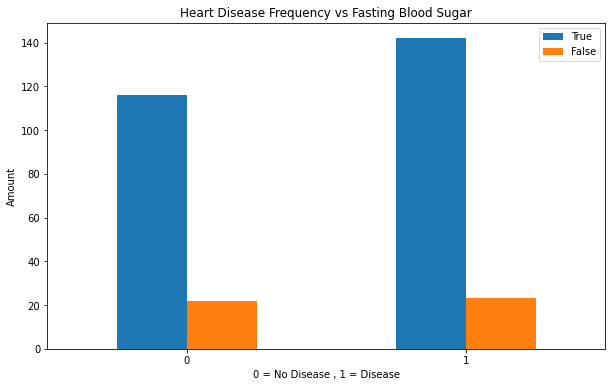

In [44]:
#Create a plot for crosstab

pd.crosstab(df['target'],df['fbs']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Relation Between heart rate slope and cholestrol level with respect to gender')

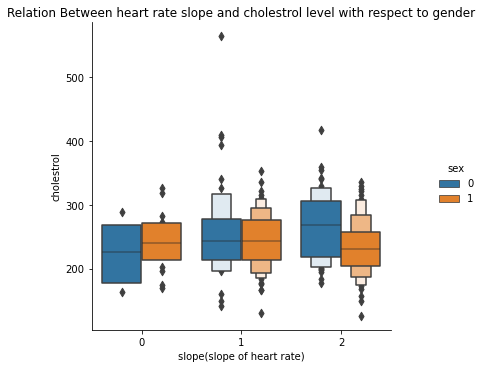

In [46]:
#Plot on Relation Between heart rate slope and cholestrol level with respect to gender
sns.catplot(x="slope", y="chol",hue="sex",kind="boxen", data=df)
plt.xlabel('slope(slope of heart rate)')
plt.ylabel('cholestrol')
plt.title(label="Relation Between heart rate slope and cholestrol level with respect to gender",loc ='center')

In [47]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [48]:
pd.crosstab(df['target'],df['restecg'])

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


In [49]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [50]:
pd.crosstab(df['target'],df['thal'])

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


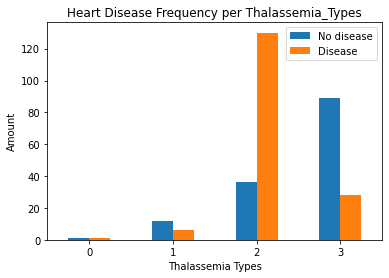

In [51]:
# Make the crosstab more visual

pd.crosstab(df['thal'],df['target']).plot(kind='bar')
plt.title("Heart Disease Frequency per Thalassemia_Types")
plt.xlabel("Thalassemia Types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

Text(0.5, 1.0, 'Chest Pain type with respect to age and sex')

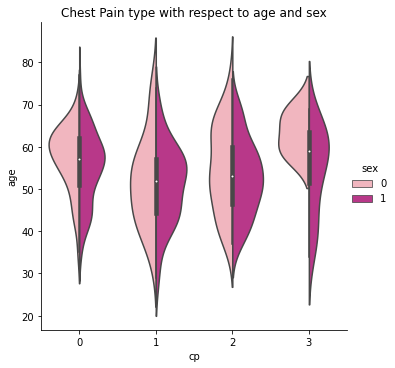

In [52]:
sns.catplot(data=df, kind="violin", x="cp", y="age",hue="sex", split=True,palette="RdPu")
plt.title("Chest Pain type with respect to age and sex")

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
knn=KNeighborsClassifier()

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:

knn.score(X_train,y_train)

0.7603305785123967

In [58]:
knn_y_preds=knn.predict(X_test)

In [63]:
knn.score(X_test,y_test)

0.6885245901639344

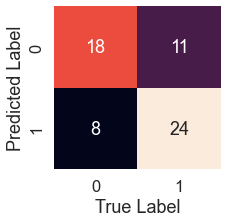

In [64]:
plot_conf_mat(y_test,knn_y_preds)

In [65]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



Maximum KNN score on the test data: 75.41


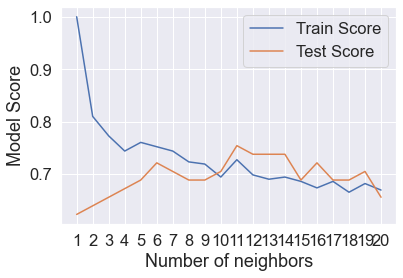

In [66]:

#retarinig data
#Let's tune KNN
train_scores=[]
test_scores=[]

#Create a list of different n_neighbors
neighbors=range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop thorugh different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the trainig scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))
    
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")